# Data processing and collection



In [5]:
# !pip install yahooquery
# !pip install yfinance

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import yfinance as yf
import datetime

from yahooquery import Screener
import itertools

%config InlineBackend.figure_format = 'retina'

In [7]:
# download available cryptocurrency tickers from yfinance
s = Screener()
data = s.get_screeners('all_cryptocurrencies_us', count=250)

dicts = data['all_cryptocurrencies_us']['quotes']
symbols = [d['symbol'] for d in dicts]

symbols

['BTC-USD',
 'ETH-USD',
 'USDT-USD',
 'BNB-USD',
 'SOL-USD',
 'STETH-USD',
 'USDC-USD',
 'XRP-USD',
 'DOGE-USD',
 'TON11419-USD',
 'ADA-USD',
 'WSTETH-USD',
 'SHIB-USD',
 'AVAX-USD',
 'WETH-USD',
 'WBTC-USD',
 'TRX-USD',
 'WTRX-USD',
 'LINK-USD',
 'BCH-USD',
 'DOT-USD',
 'NEAR-USD',
 'MATIC-USD',
 'EETH-USD',
 'UNI7083-USD',
 'LTC-USD',
 'WEETH-USD',
 'LEO-USD',
 'DAI-USD',
 'PEPE24478-USD',
 'ICP-USD',
 'BTCB-USD',
 'ETC-USD',
 'EZETH-USD',
 'KAS-USD',
 'RNDR-USD',
 'APT21794-USD',
 'FIL-USD',
 'WBETH-USD',
 'FDUSD-USD',
 'STX4847-USD',
 'HBAR-USD',
 'USDE29470-USD',
 'MNT27075-USD',
 'XMR-USD',
 'ATOM-USD',
 'CRO-USD',
 'IMX10603-USD',
 'OKB-USD',
 'XLM-USD',
 'ARB11841-USD',
 'WIF-USD',
 'SUI20947-USD',
 'FLOKI-USD',
 'INJ-USD',
 'TAO22974-USD',
 'GRT6719-USD',
 'AR-USD',
 'OP-USD',
 'VET-USD',
 'MKR-USD',
 'RETH-USD',
 'FTM-USD',
 'NOT-USD',
 'JASMY-USD',
 'THETA-USD',
 'BONK-USD',
 'RUNE-USD',
 'ONDO-USD',
 'TIA22861-USD',
 'METH29035-USD',
 'JITOSOL-USD',
 'LDO-USD',
 'BGB-USD',


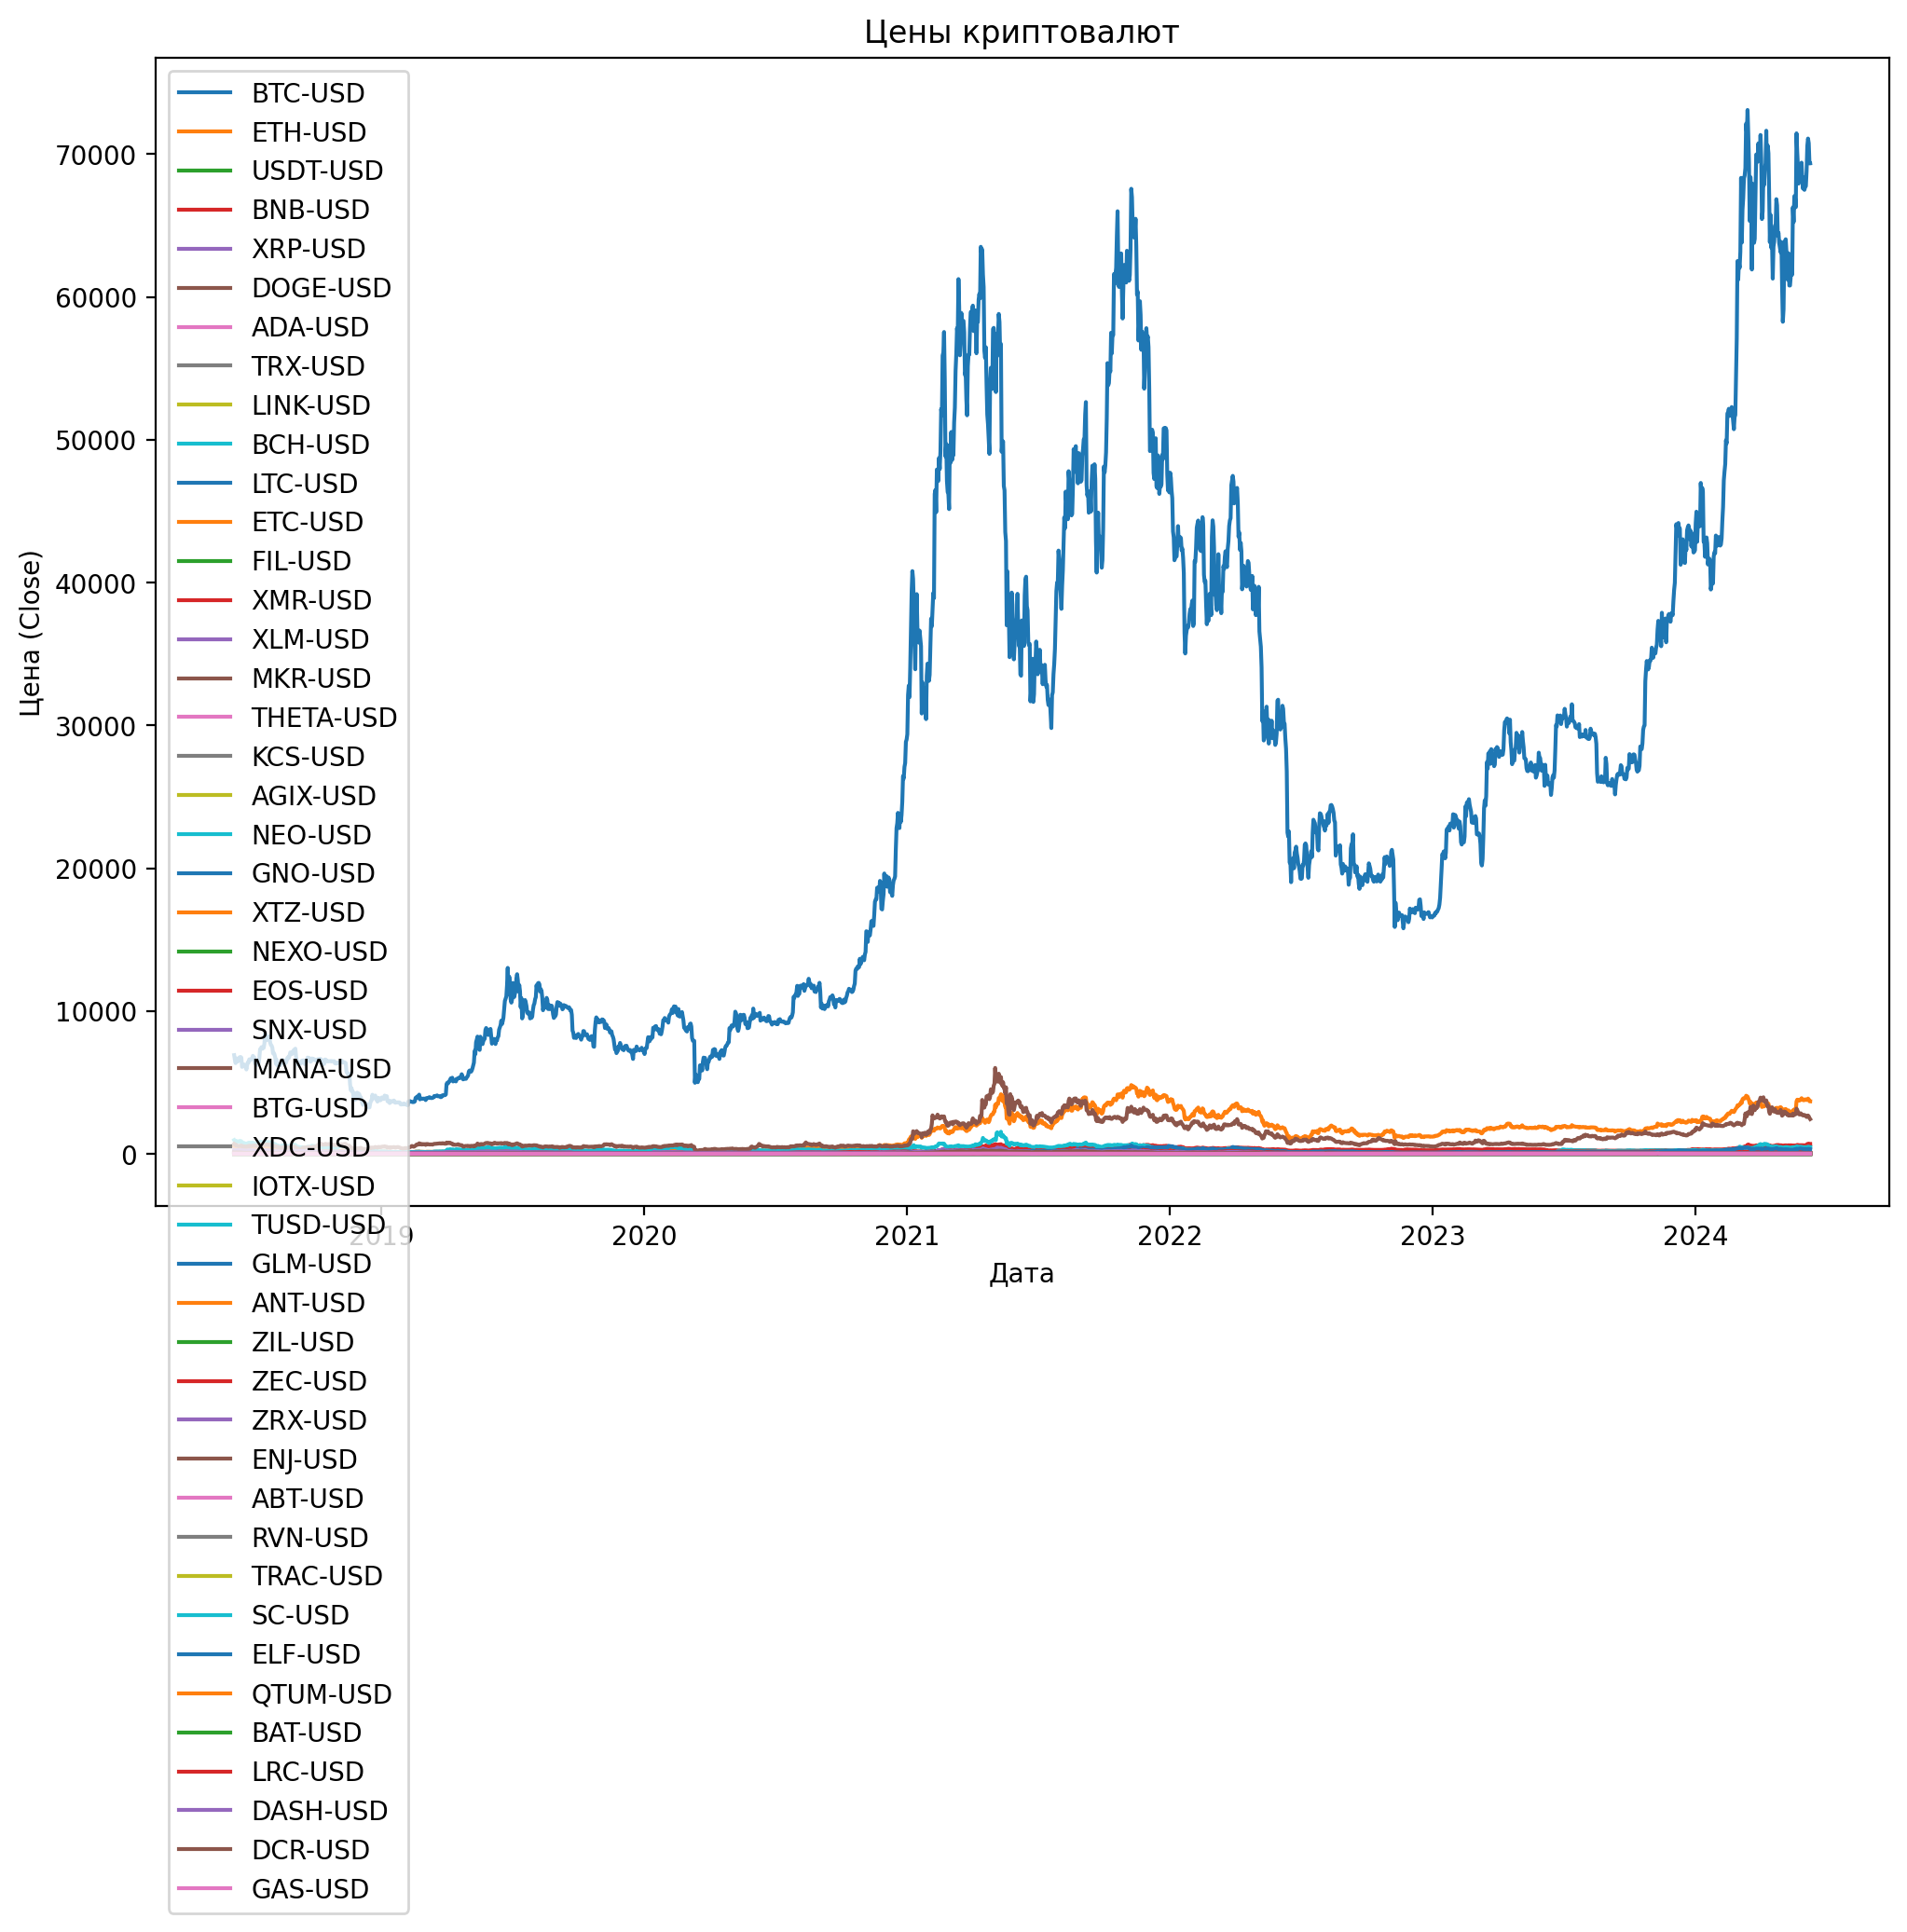

In [8]:
# Function to download cryptocurrency data from Yahoo Finance
def load_crypto_data(tickers, start_date, end_date, col_name = 'Close'):
    data = {}
    for ticker in tickers:
        crypto = yf.Ticker(ticker)

        # Loading cryptocurrency price data (by selected column)
        crypto_data = crypto.history(start=start_date, end=end_date)[col_name]

        # Check that the cryptocurrency has data for the last 5 years
        if len(crypto_data) >= 365*6:
            data[ticker] = crypto_data

    df = pd.DataFrame(data)

    return df


def visualize_crypto_data(df):

    plt.figure(figsize=(12, 8))
    for ticker in df.columns:
        plt.plot(df.index, df[ticker], label=ticker)
        # plt.plot(df.index, df[ticker])
    plt.title('Цены криптовалют')
    plt.xlabel('Дата')
    plt.ylabel('Цена (Close)')
    plt.legend(loc='upper left')
    plt.show()



def main():
    tickers = symbols
# Define the time period for downloading data
    end_date = datetime.datetime.now()
    start_date = (end_date - datetime.timedelta(days=365*6)).strftime('%Y-%m-%d')
    end_date = end_date.strftime('%Y-%m-%d')

# Loading data about cryptocurrencies
    crypto_data = load_crypto_data(tickers, start_date, end_date)

    crypto_data.to_csv('crypto_values_close.csv')

    visualize_crypto_data(crypto_data)


if __name__ == '__main__':
    main()

**As a result of executing the function, we obtain a dataset of coins for which there was data for the selected period of time**


**We will separately upload data on the volume of coins:**

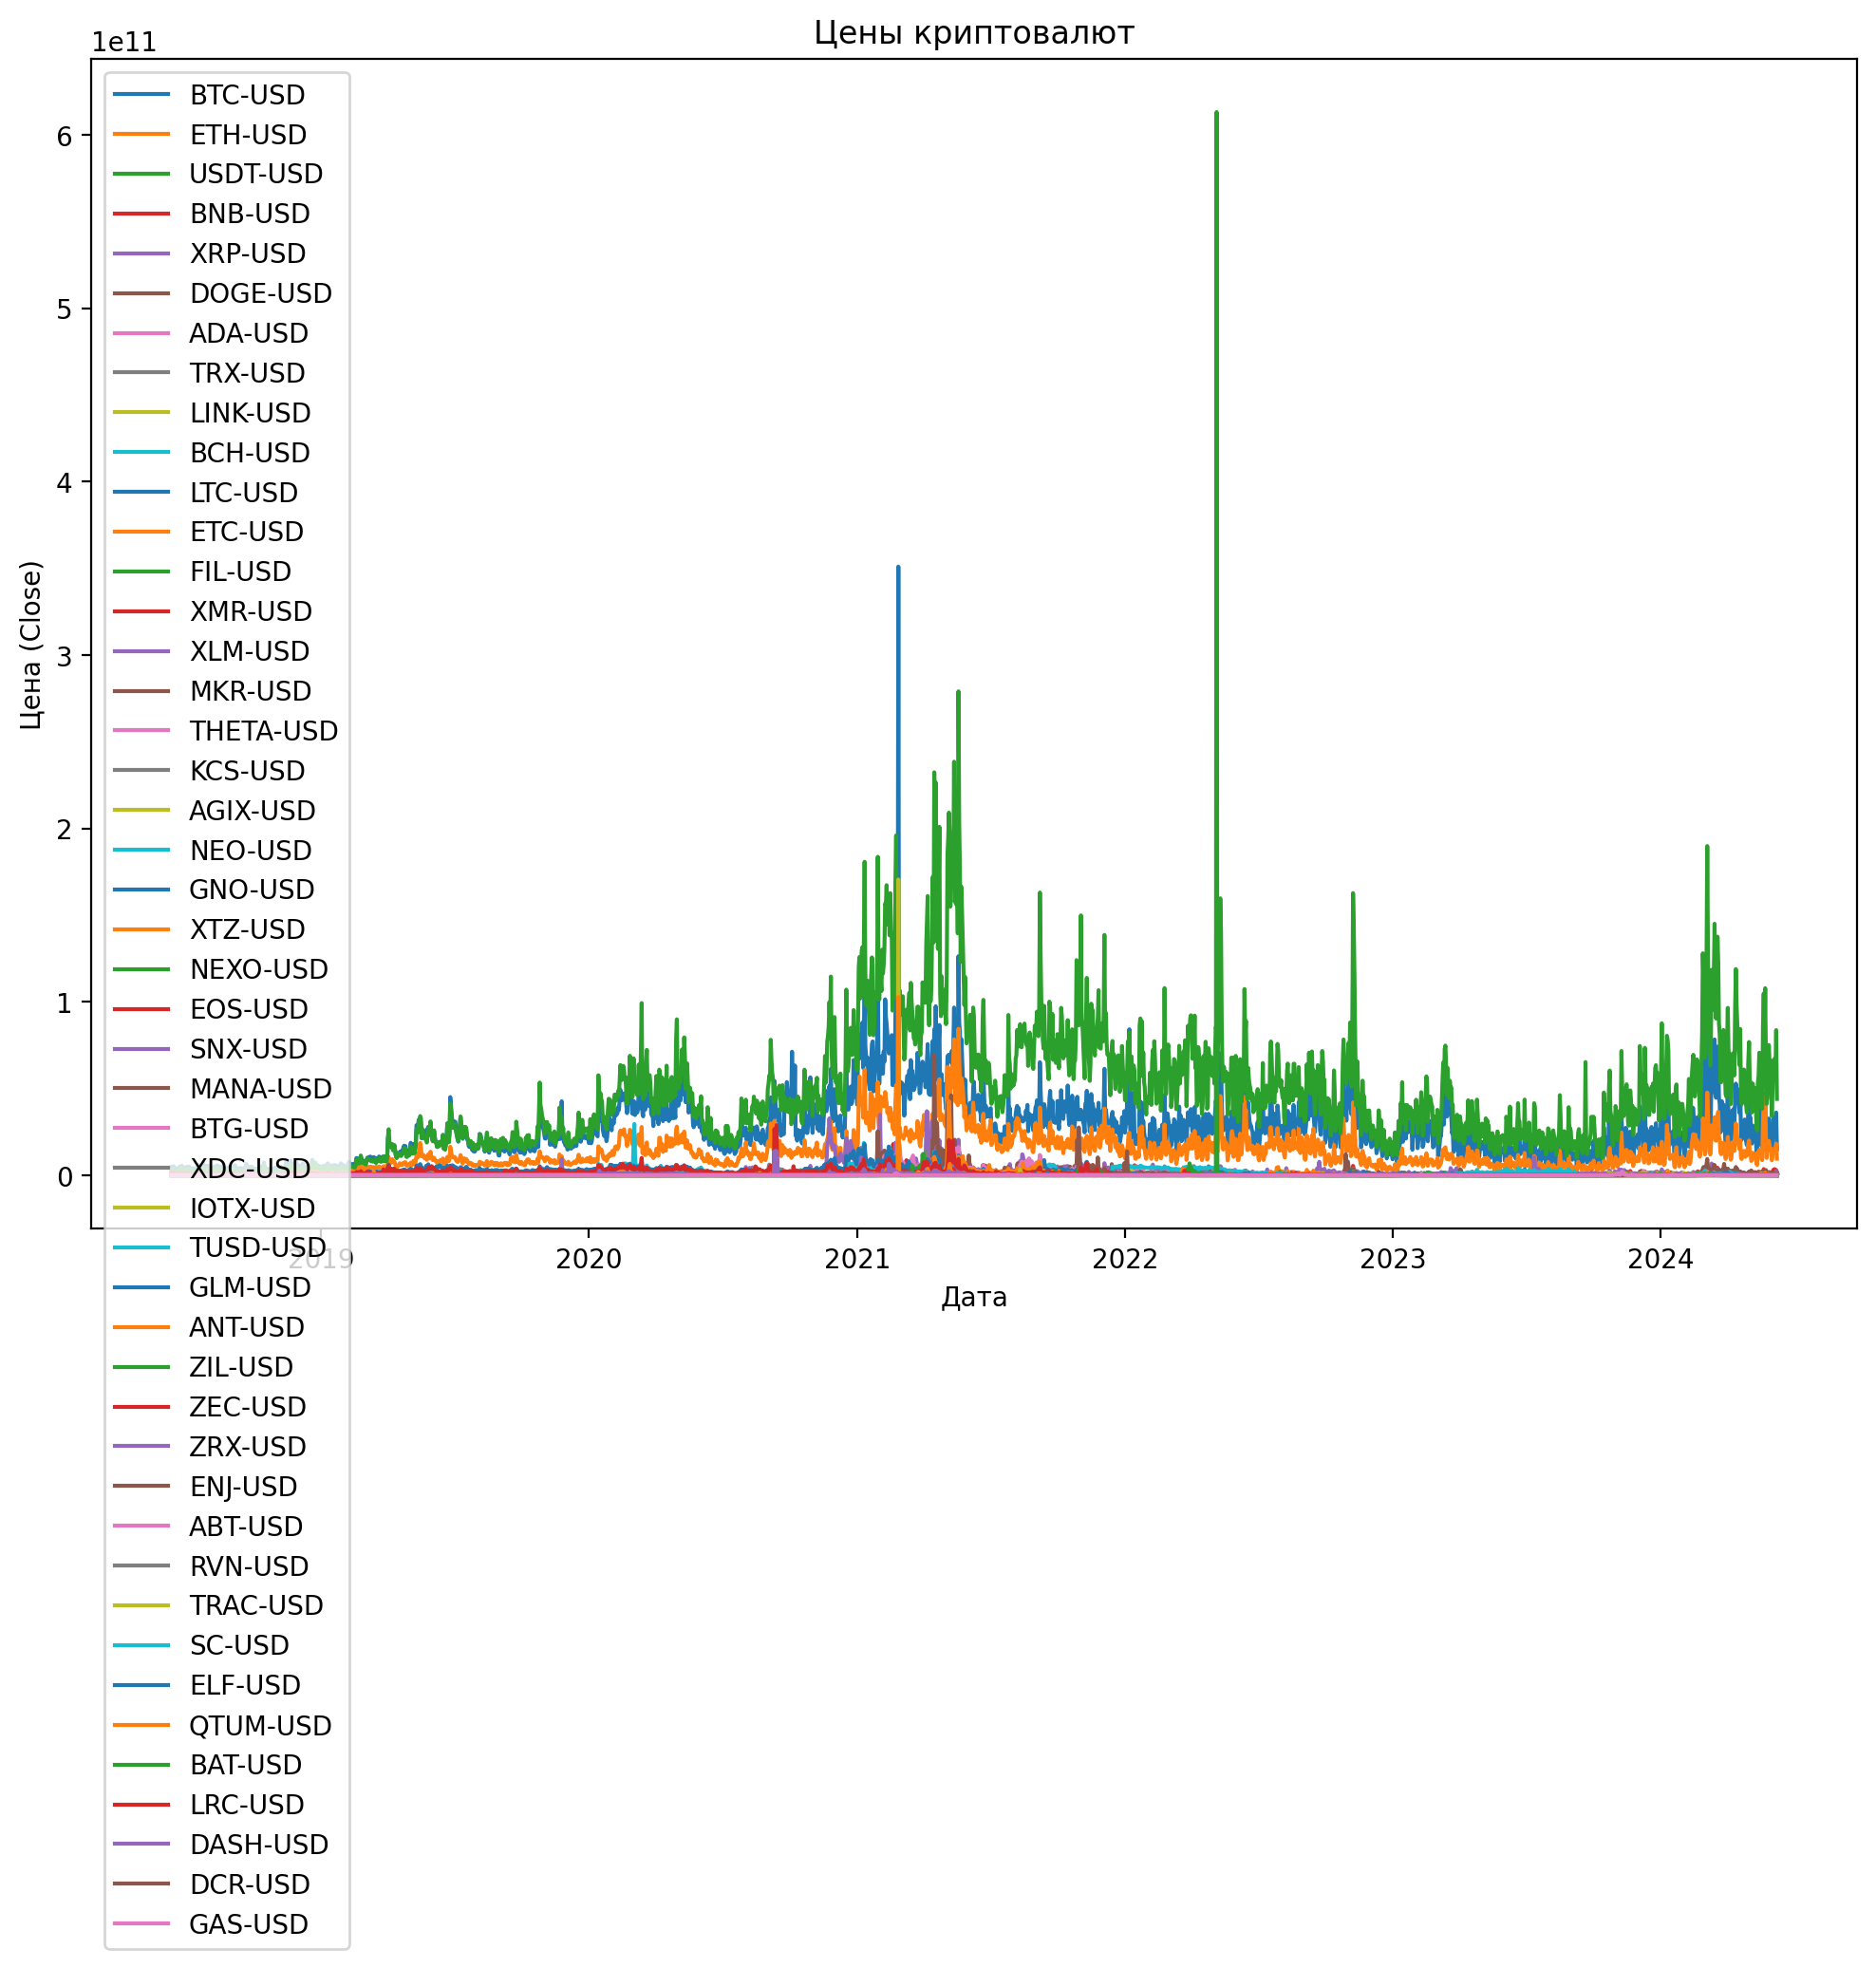

In [9]:
# save data on trading volume separately
def main():
    tickers = symbols

    end_date = datetime.datetime.now()
    start_date = (end_date - datetime.timedelta(days=365*6)).strftime('%Y-%m-%d')



    end_date = end_date.strftime('%Y-%m-%d')

    crypto_data = load_crypto_data(tickers, start_date, end_date,'Volume')

    crypto_data.to_csv('crypto_values_volume.csv')

    visualize_crypto_data(crypto_data)


if __name__ == '__main__':
    main()

In [8]:
crypto_values = pd.read_csv("crypto_values_close.csv")
crypto_values['Date'] = pd.to_datetime(crypto_values.Date).dt.date
crypto_values.head()

Date      BTC-USD     ETH-USD  USDT-USD  BNB-USD   XRP-USD  DOGE-USD  \
0  2018-06-11  6906.919922  533.283997   1.00193  15.3835  0.604066  0.003234   
1  2018-06-12  6582.359863  496.842987   1.00077  15.2262  0.562933  0.003089   
2  2018-06-13  6349.899902  477.493988   1.00353  14.5891  0.534663  0.002817   
3  2018-06-14  6675.350098  519.742004   1.00395  14.8953  0.561306  0.002944   
4  2018-06-15  6456.580078  491.003998   1.00695  15.0481  0.537707  0.002901   

    ADA-USD   TRX-USD  LINK-USD  ...   RVN-USD  TRAC-USD    SC-USD   ELF-USD  \
0  0.181280  0.048829  0.262975  ...  0.024359  0.154359  0.014462  0.793171   
1  0.166585  0.043982  0.228636  ...  0.023065  0.136330  0.012874  0.696955   
2  0.160408  0.041533  0.214526  ...  0.020475  0.123176  0.012091  0.663637   
3  0.172375  0.045417  0.239964  ...  0.024670  0.153556  0.014151  0.693614   
4  0.162747  0.042870  0.223557  ...  0.024390  0.145590  0.013033  0.685285   

   QTUM-USD   BAT-USD   LRC-USD    DASH-USD    DCR-USD  GAS-USD  
0   11.9838  0.233626  0.417903  271.809998  95.457001  15.3696  
1   11.2964  0.208202  0.364944  261.115997  86.651802  14.2886  
2   10.6549  0.195023  0.352978  245.957993  86.396500  13.2916  
3   11.1763  0.219573  0.380893  268.321014  99.242798  14.4214  
4   10.7026  0.235921  0.361331  258.058014  91.035896  13.3367  

[5 rows x 48 columns]

In [9]:
len(crypto_values.columns[1:])

47

**Description of the dataset:**
- data on trading volume and closing prices of 52 coins
- period: 5 years
- daily data
- no passes

## Class wrapper for preprocessing
- calculation of growth
- calculation of overall correlation + visualization
- calculation of monthly correlation + visualization for each coin


***Analysis of the components of the series:***
- smoothing calculation (sliding window) - for the original series and for increments + visualization for each coin
- double exponential smoothing - for the original series and for increments + visualization for each coin
- calculation of correlations (for all time), as well as correlations by month - look at the dynamics of the correlation, which will be used in the future to build a graph

In [10]:
# альтернативный способ чтения файла, если он находится в другой папке 
import importlib.util
import sys
from pathlib import Path

# текущая рабочую директорию
current_directory = Path().resolve()

# путь к файлу 
model_path = current_directory / 'Preproc' / 'preproc_module.py'

# спецификация модуля
spec = importlib.util.spec_from_file_location("preproc_module", model_path)
preproc = importlib.util.module_from_spec(spec)

# добавление модуля в sys.modules
sys.modules["preproc"] = preproc
spec.loader.exec_module(preproc)

In [11]:
# если всё лежит в одной директории
from preproc_module import CryptoPreproc

In [12]:
preprocessor = CryptoPreproc(crypto_values)

# Calculate the growth for each coin
returns = preprocessor.returns_calc()
returns.head()

BTC-USD   ETH-USD  USDT-USD   BNB-USD   XRP-USD  DOGE-USD   ADA-USD  \
0 -0.046991 -0.068333 -0.001158 -0.010225 -0.068094 -0.044836 -0.081062   
1 -0.035316 -0.038944  0.002758 -0.041842 -0.050219 -0.088054 -0.037080   
2  0.051253  0.088479  0.000418  0.020988  0.049831  0.045083  0.074603   
3 -0.032773 -0.055293  0.002988  0.010258 -0.042043 -0.014606 -0.055855   
4  0.014494  0.017593 -0.002691  0.050578 -0.005436 -0.002068  0.001321   

    TRX-USD  LINK-USD   BCH-USD  ...  TRAC-USD    SC-USD   ELF-USD  QTUM-USD  \
0 -0.099265 -0.130579 -0.087767  ... -0.116799 -0.109805 -0.121305 -0.057361   
1 -0.055682 -0.061714 -0.034527  ... -0.096486 -0.060820 -0.047805 -0.056788   
2  0.093516  0.118578  0.063205  ...  0.246639  0.170375  0.045171  0.048935   
3 -0.056080 -0.068373 -0.053796  ... -0.051877 -0.079005 -0.012008 -0.042384   
4  0.008048 -0.006866  0.003386  ...  0.011107 -0.017341  0.033364  0.007297   

    BAT-USD   LRC-USD  DASH-USD   DCR-USD   GAS-USD        Date  
0 -0.108823 -0.126726 -0.039344 -0.092243 -0.070334  2018-06-12  
1 -0.063299 -0.032789 -0.058051 -0.002946 -0.069776  2018-06-13  
2  0.125883  0.079084  0.090922  0.148690  0.085001  2018-06-14  
3  0.074454 -0.051358 -0.038249 -0.082695 -0.075215  2018-06-15  
4  0.024911  0.042775  0.031450 -0.008604  0.017073  2018-06-16  

[5 rows x 48 columns]

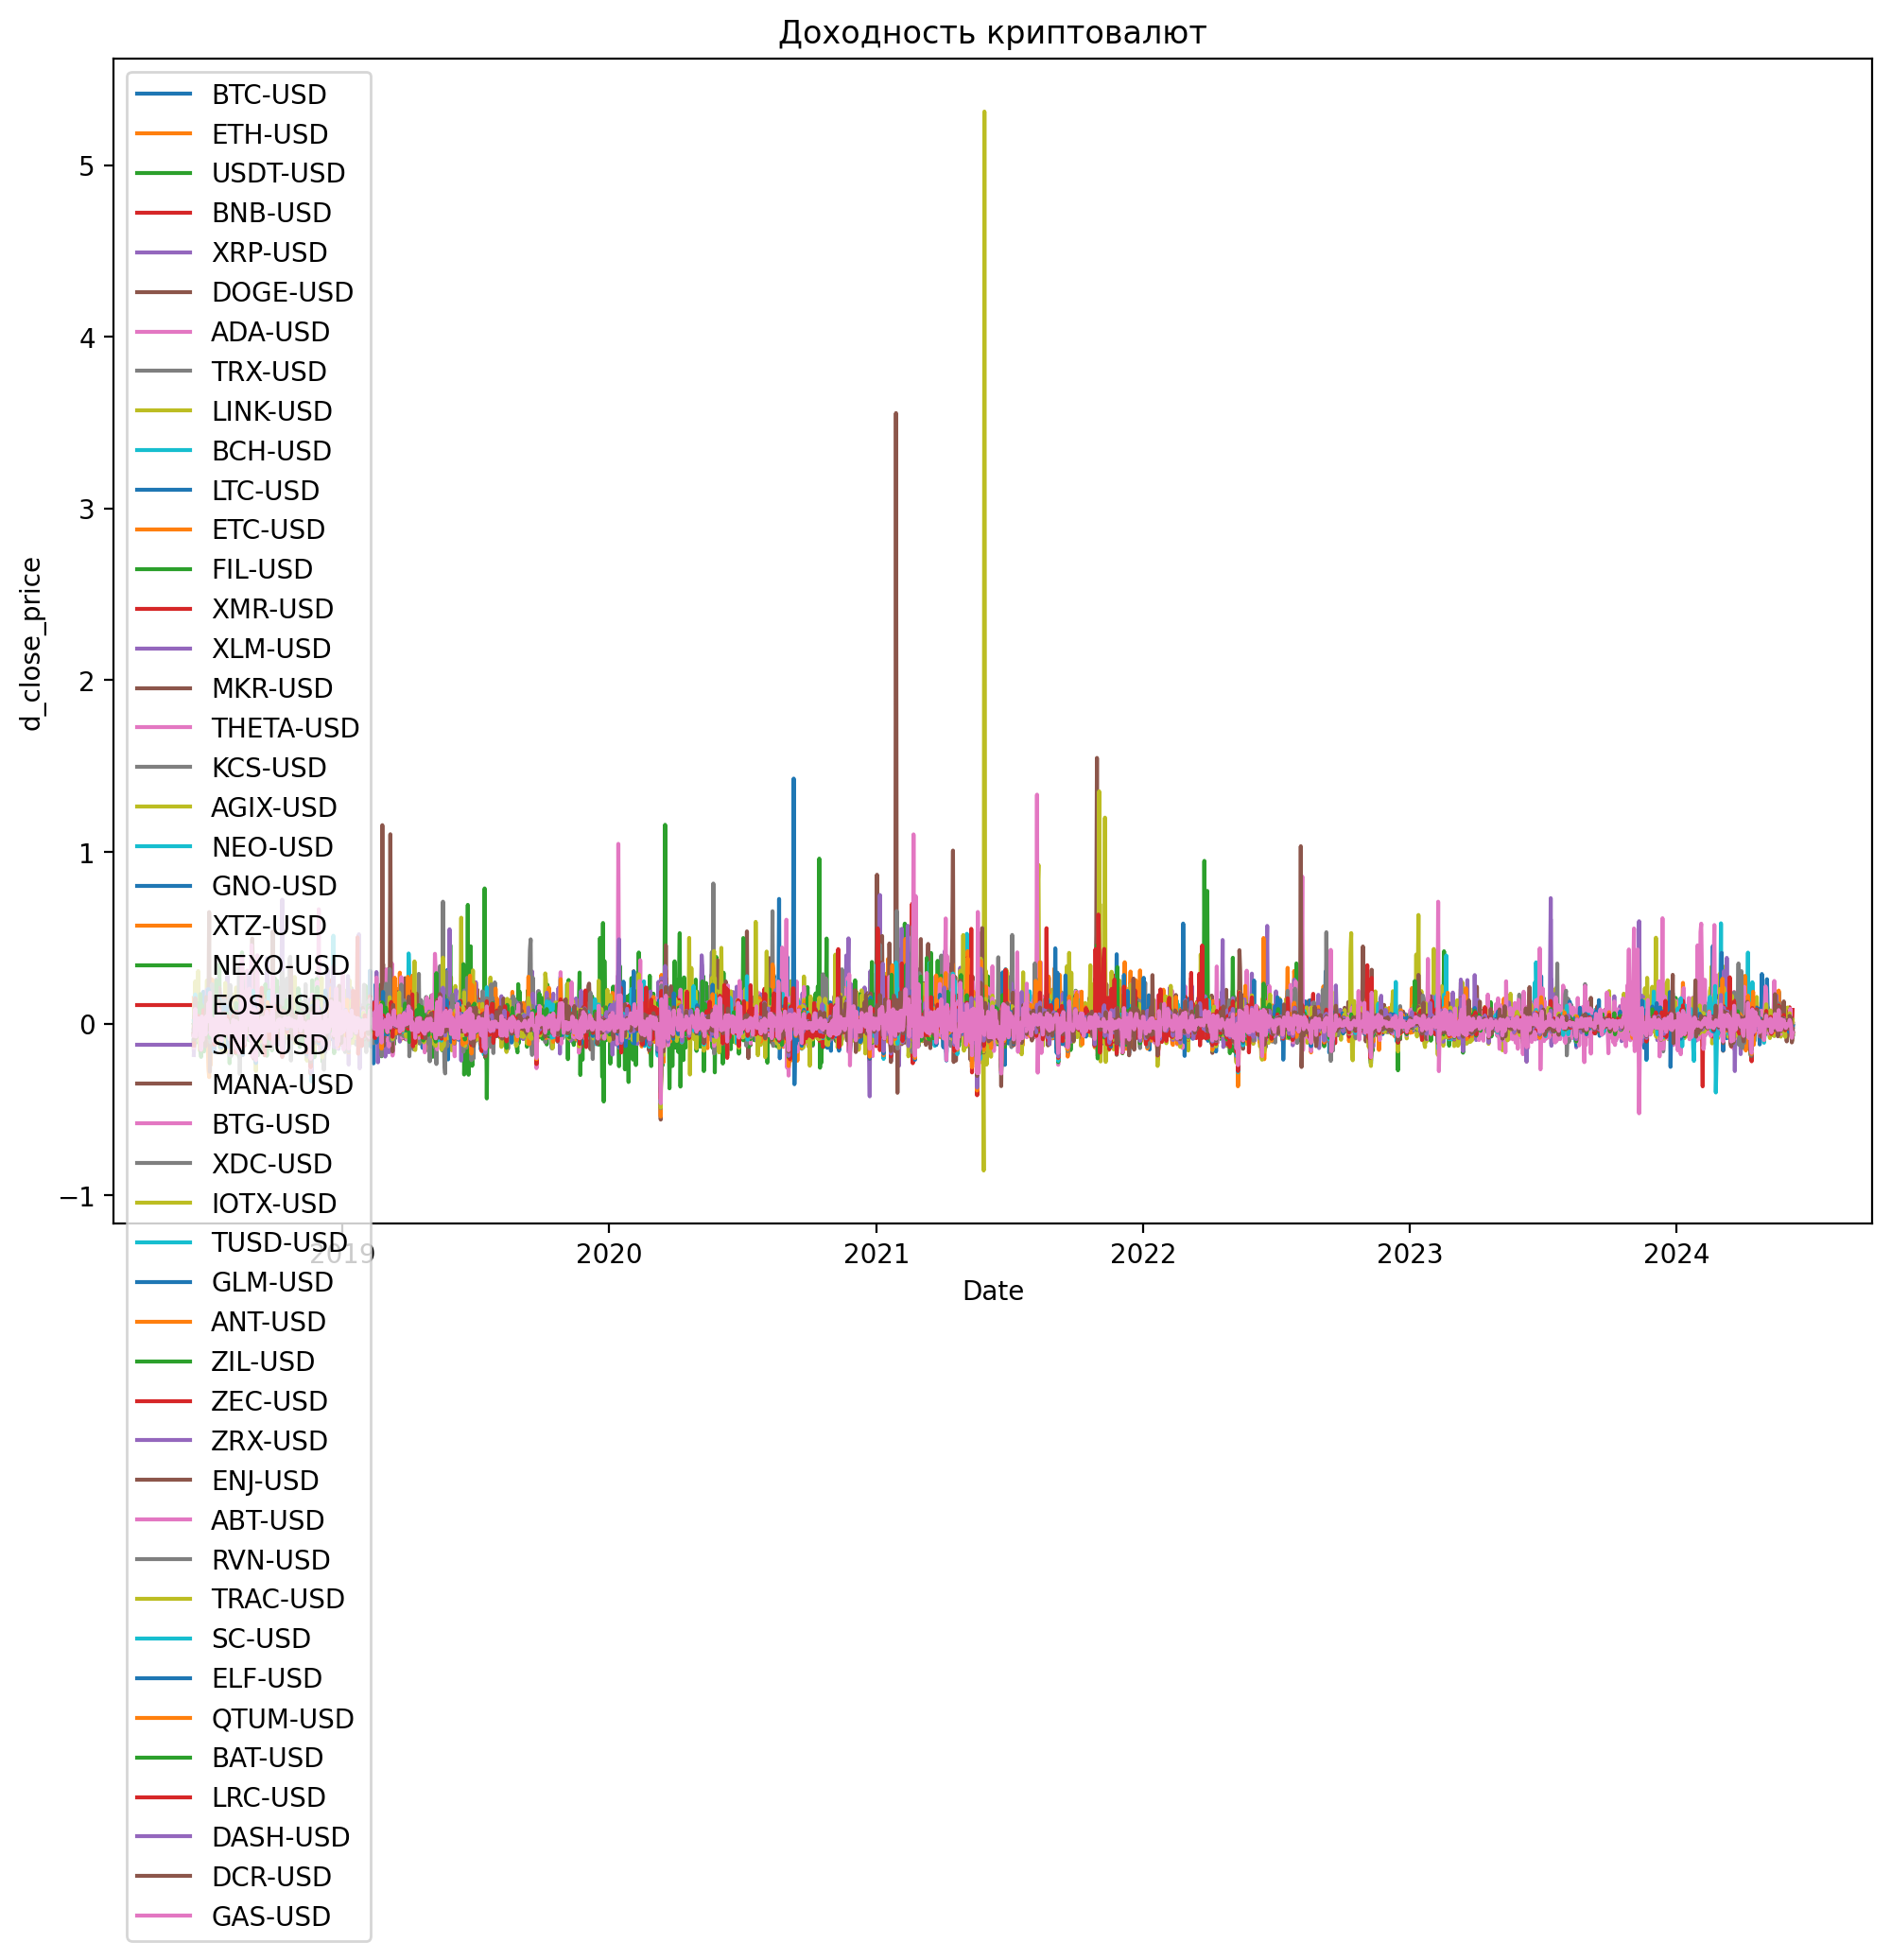

In [16]:
def visualize_crypto_data(df):

    plt.figure(figsize=(12, 8))
    date = df.Date
    df = df.drop(columns = 'Date')
    for ticker in df.columns:
        plt.plot(date,df[ticker], label=ticker)
        # plt.plot(df.index, df[ticker])
    plt.title('Доходность криптовалют')
    plt.xlabel('Date')
    plt.ylabel('d_close_price')
    plt.legend(loc='upper left')
    plt.show()

visualize_crypto_data(returns)

In [151]:
# preprocessor.visualize_distributions(crypto_values)

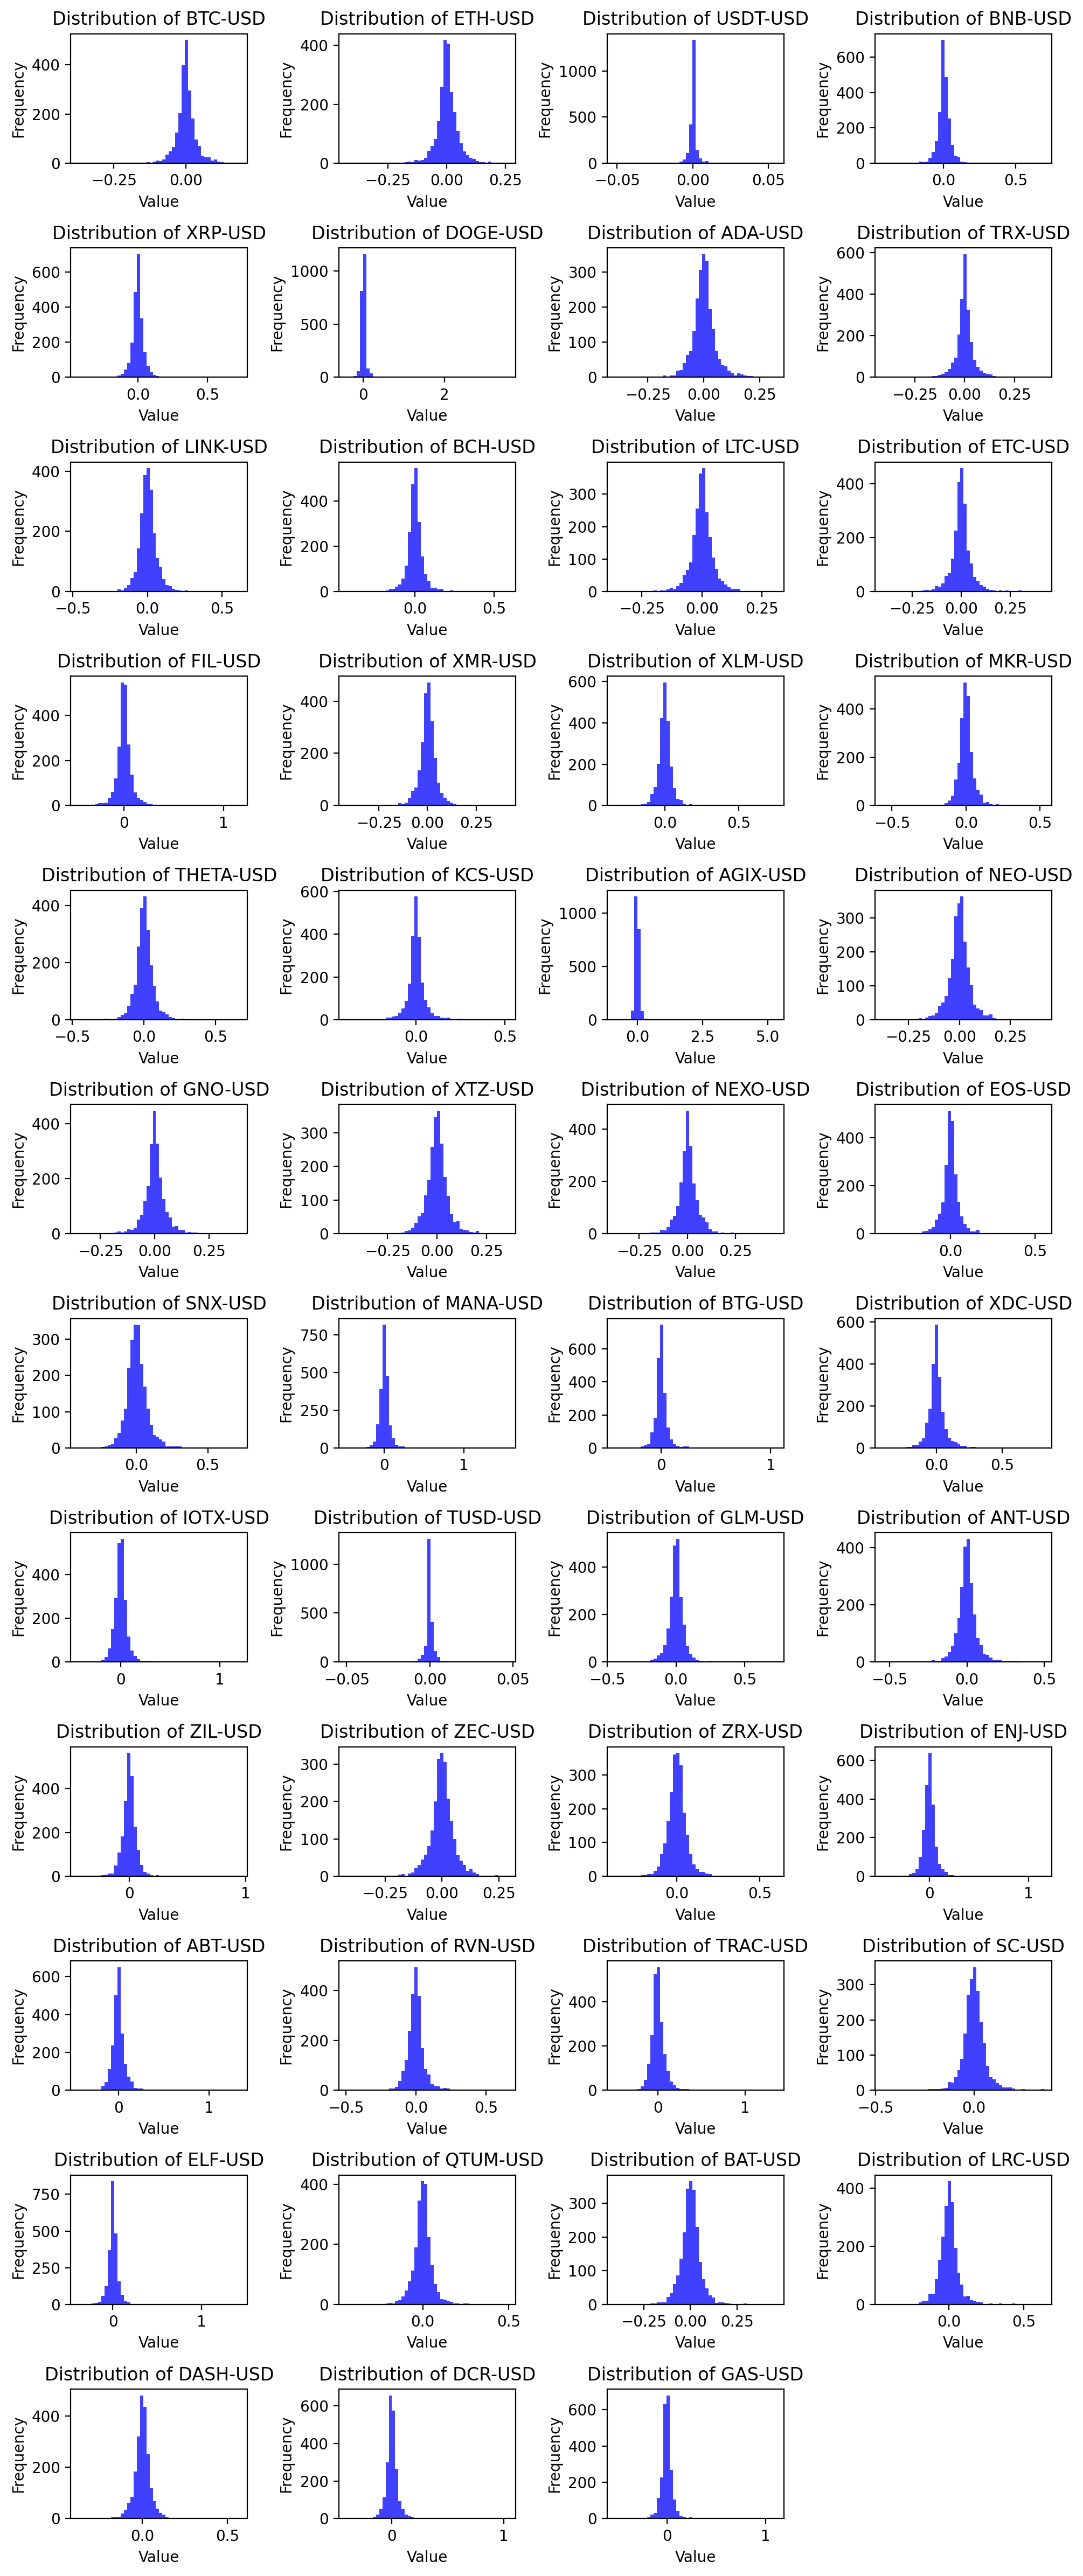

In [186]:
# returns distribution vsulization
preprocessor.visualize_distributions(returns)

**I'll try to use main characteristic for sintetic data to mesuare meethod's uality**

#### Посмотрим на приближение каждого ряда скользящим средним

По умолчанию выбрано окно в 7 дней

Посмотрим как окна различной ширины будуь сглаживать ряд

В дальнейшем для построения графа на рассматриваемых данных, будем руководствоваться полученными результатами

In [ ]:
# tickers = list(crypto_values.columns[1:])
# for i in range(len(tickers)):
#   preprocessor.calculate_rolling_mean(returns, f'{tickers[i]}')

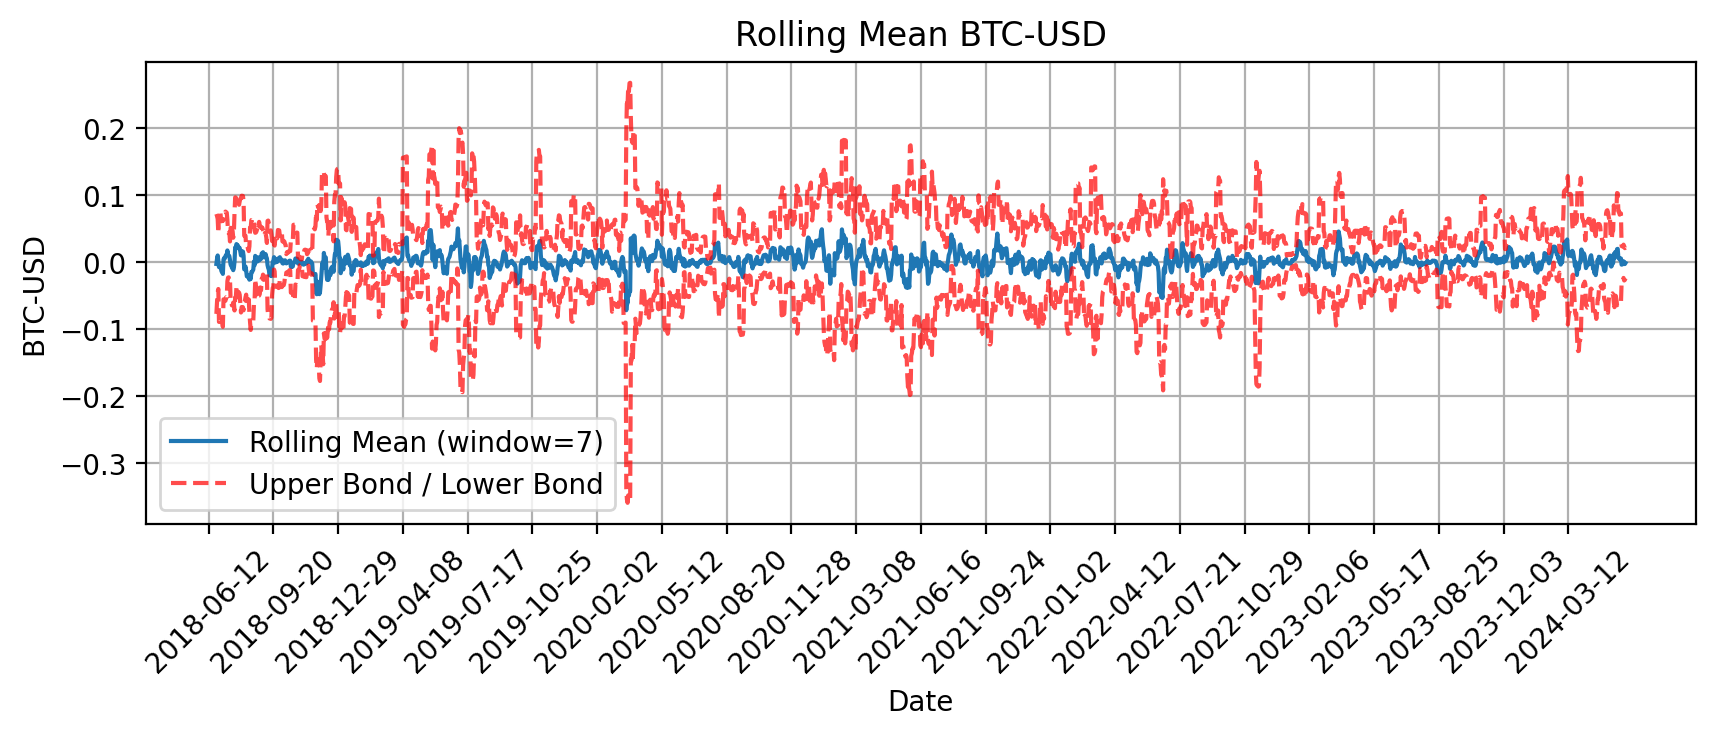

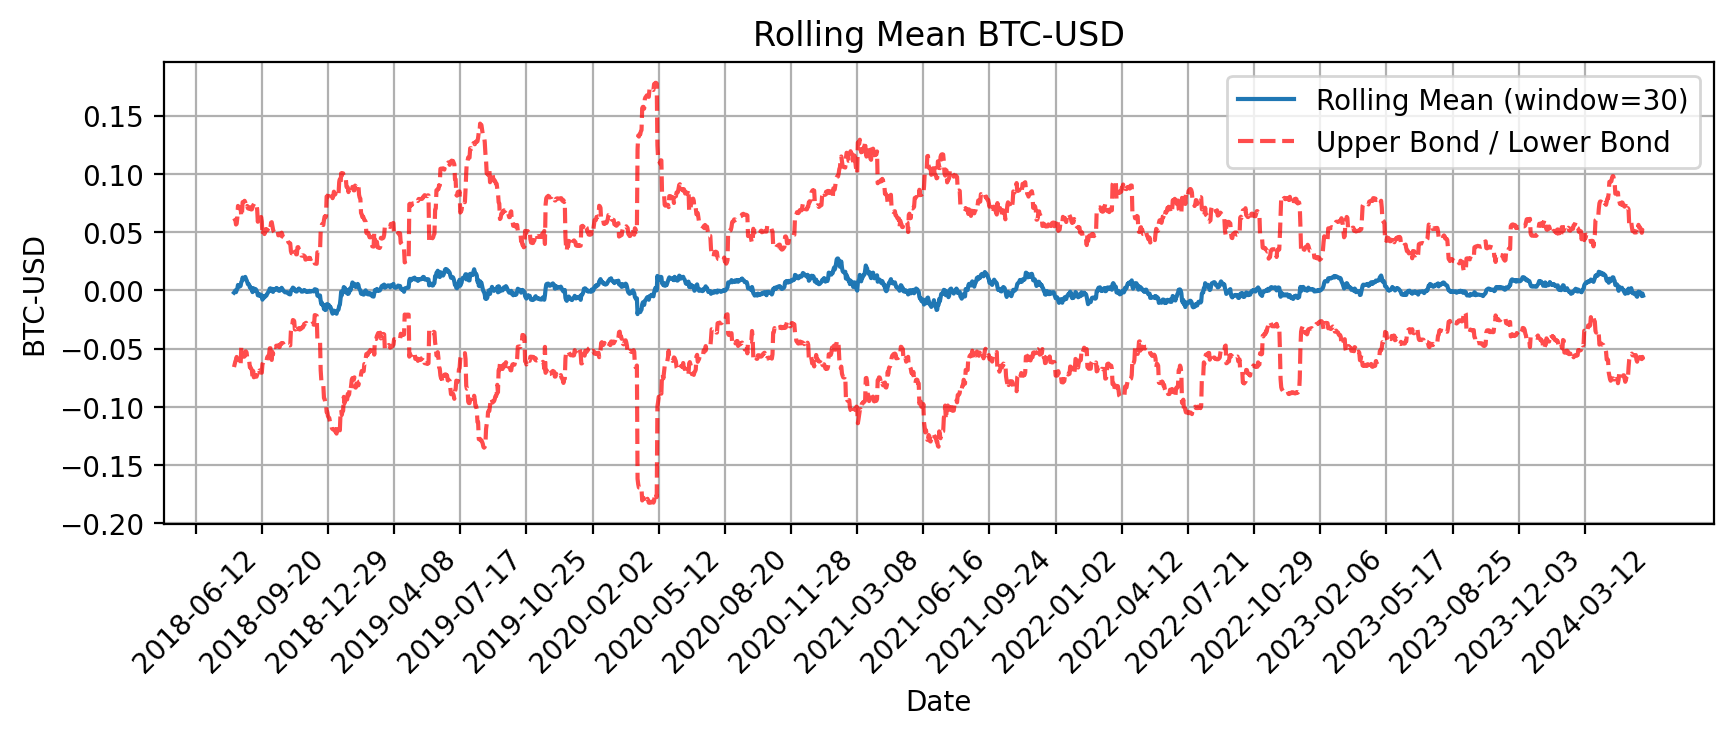

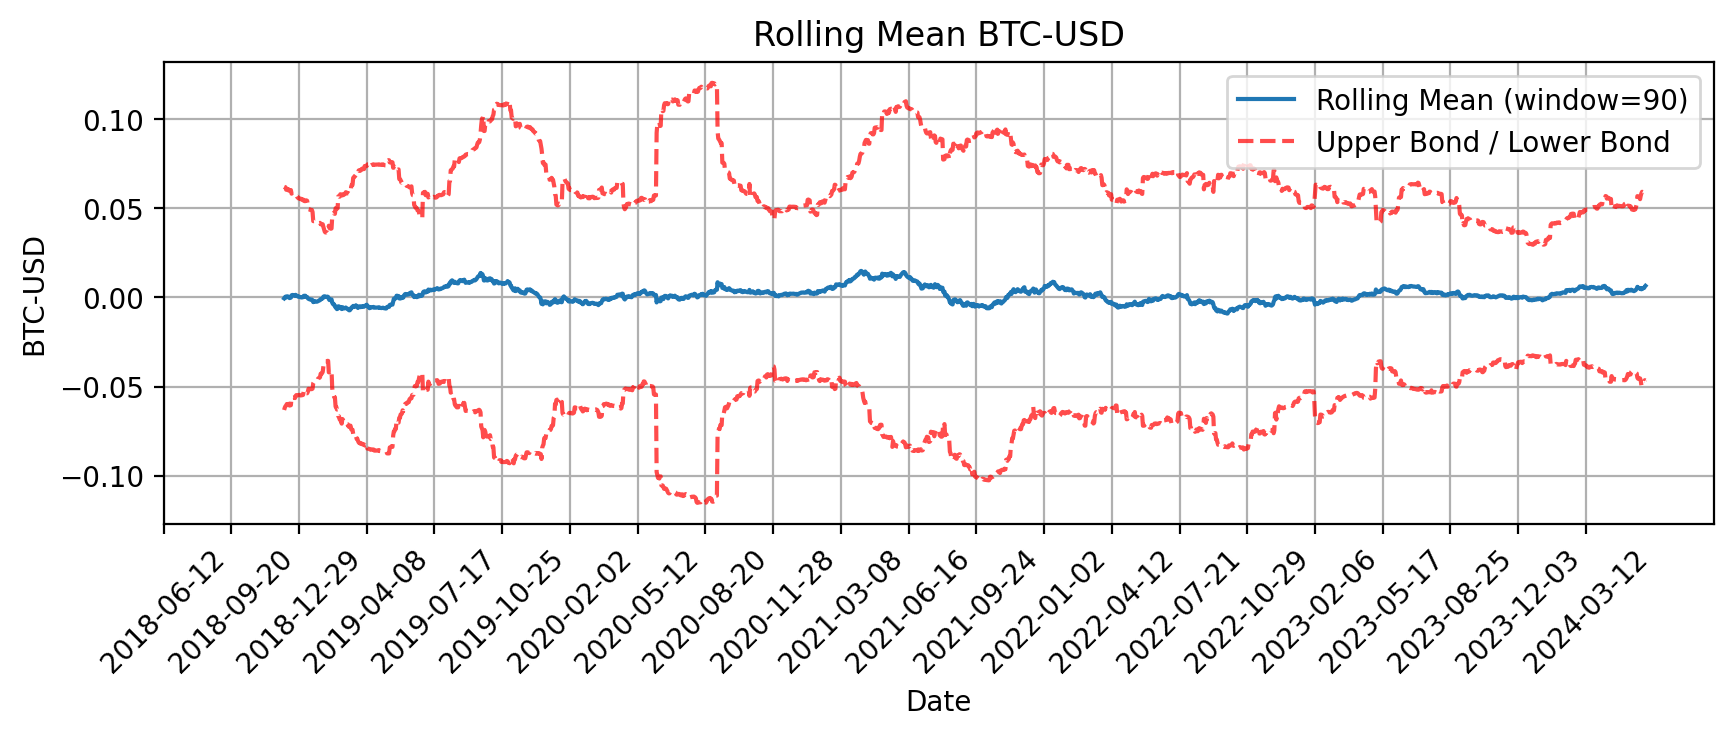

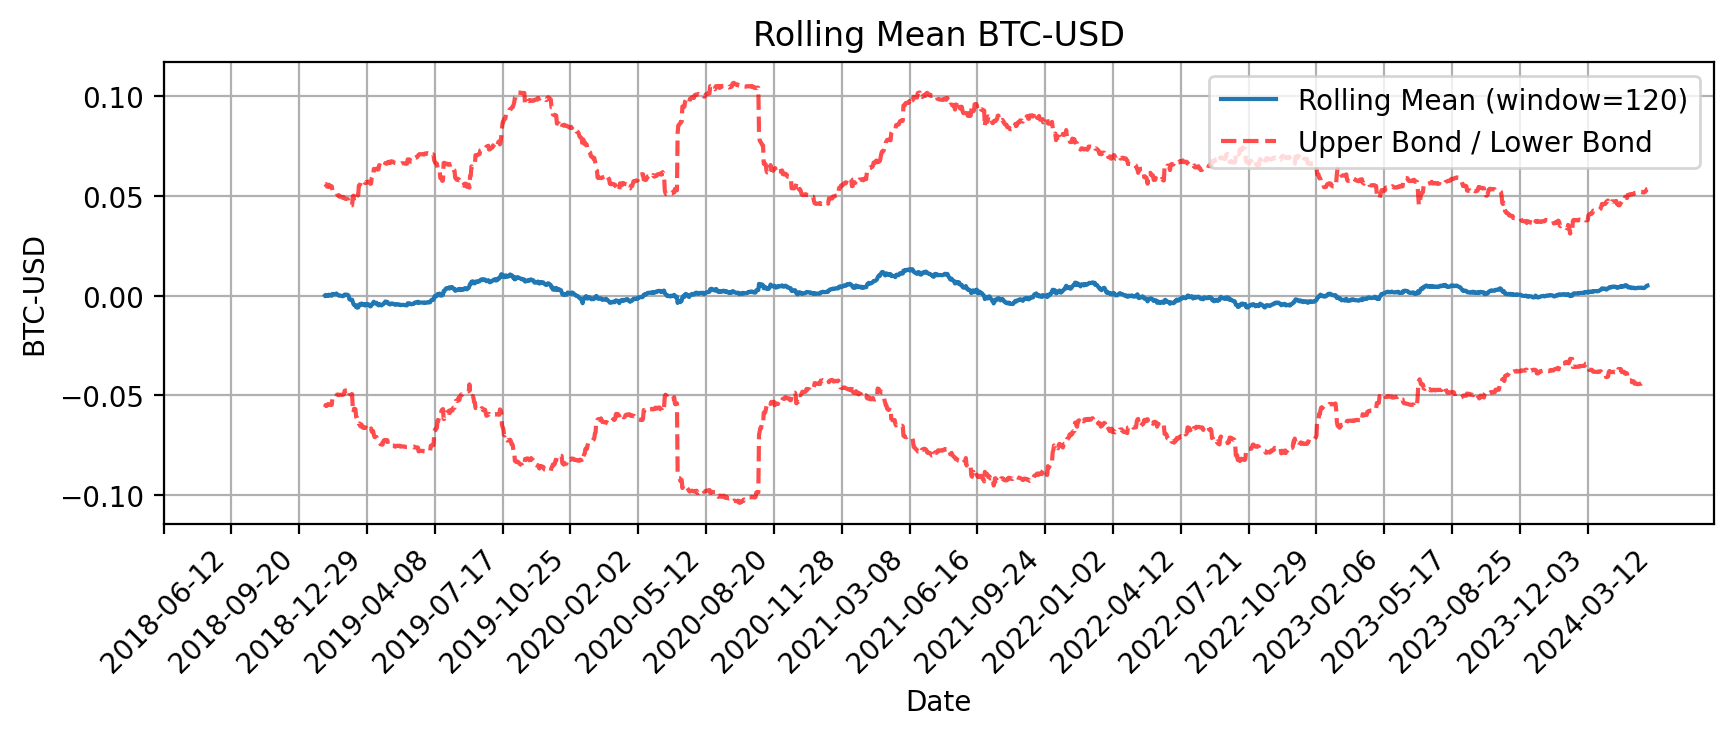

In [32]:
# сравним для одного тикера
returns = preprocessor.returns_calc()
returns.to_csv('returns_crypto.csv')
preprocessor.calculate_rolling_mean(returns, 'BTC-USD')
preprocessor.calculate_rolling_mean(returns, 'BTC-USD',window=30)
preprocessor.calculate_rolling_mean(returns, 'BTC-USD',window=90)
preprocessor.calculate_rolling_mean(returns, 'BTC-USD',window=120)

**Вывод:** \
Для построения графа при расчёте корреляции воспользуемся окном в 30 дней. То есть каждое состояние графа представляет из себя описание линейной зависимости (или нелинейно направленной зависимости в случае трансфертной энтропии) за последние 30 дней

### Расчёт корреляций
***Здесь представлена корреляция за весь рассматриваемый период***

**В основном монеты имеют корреляцию в районе 0.4 - 0.8**

**Но также есть монеты практически с нулевой корреляцией**

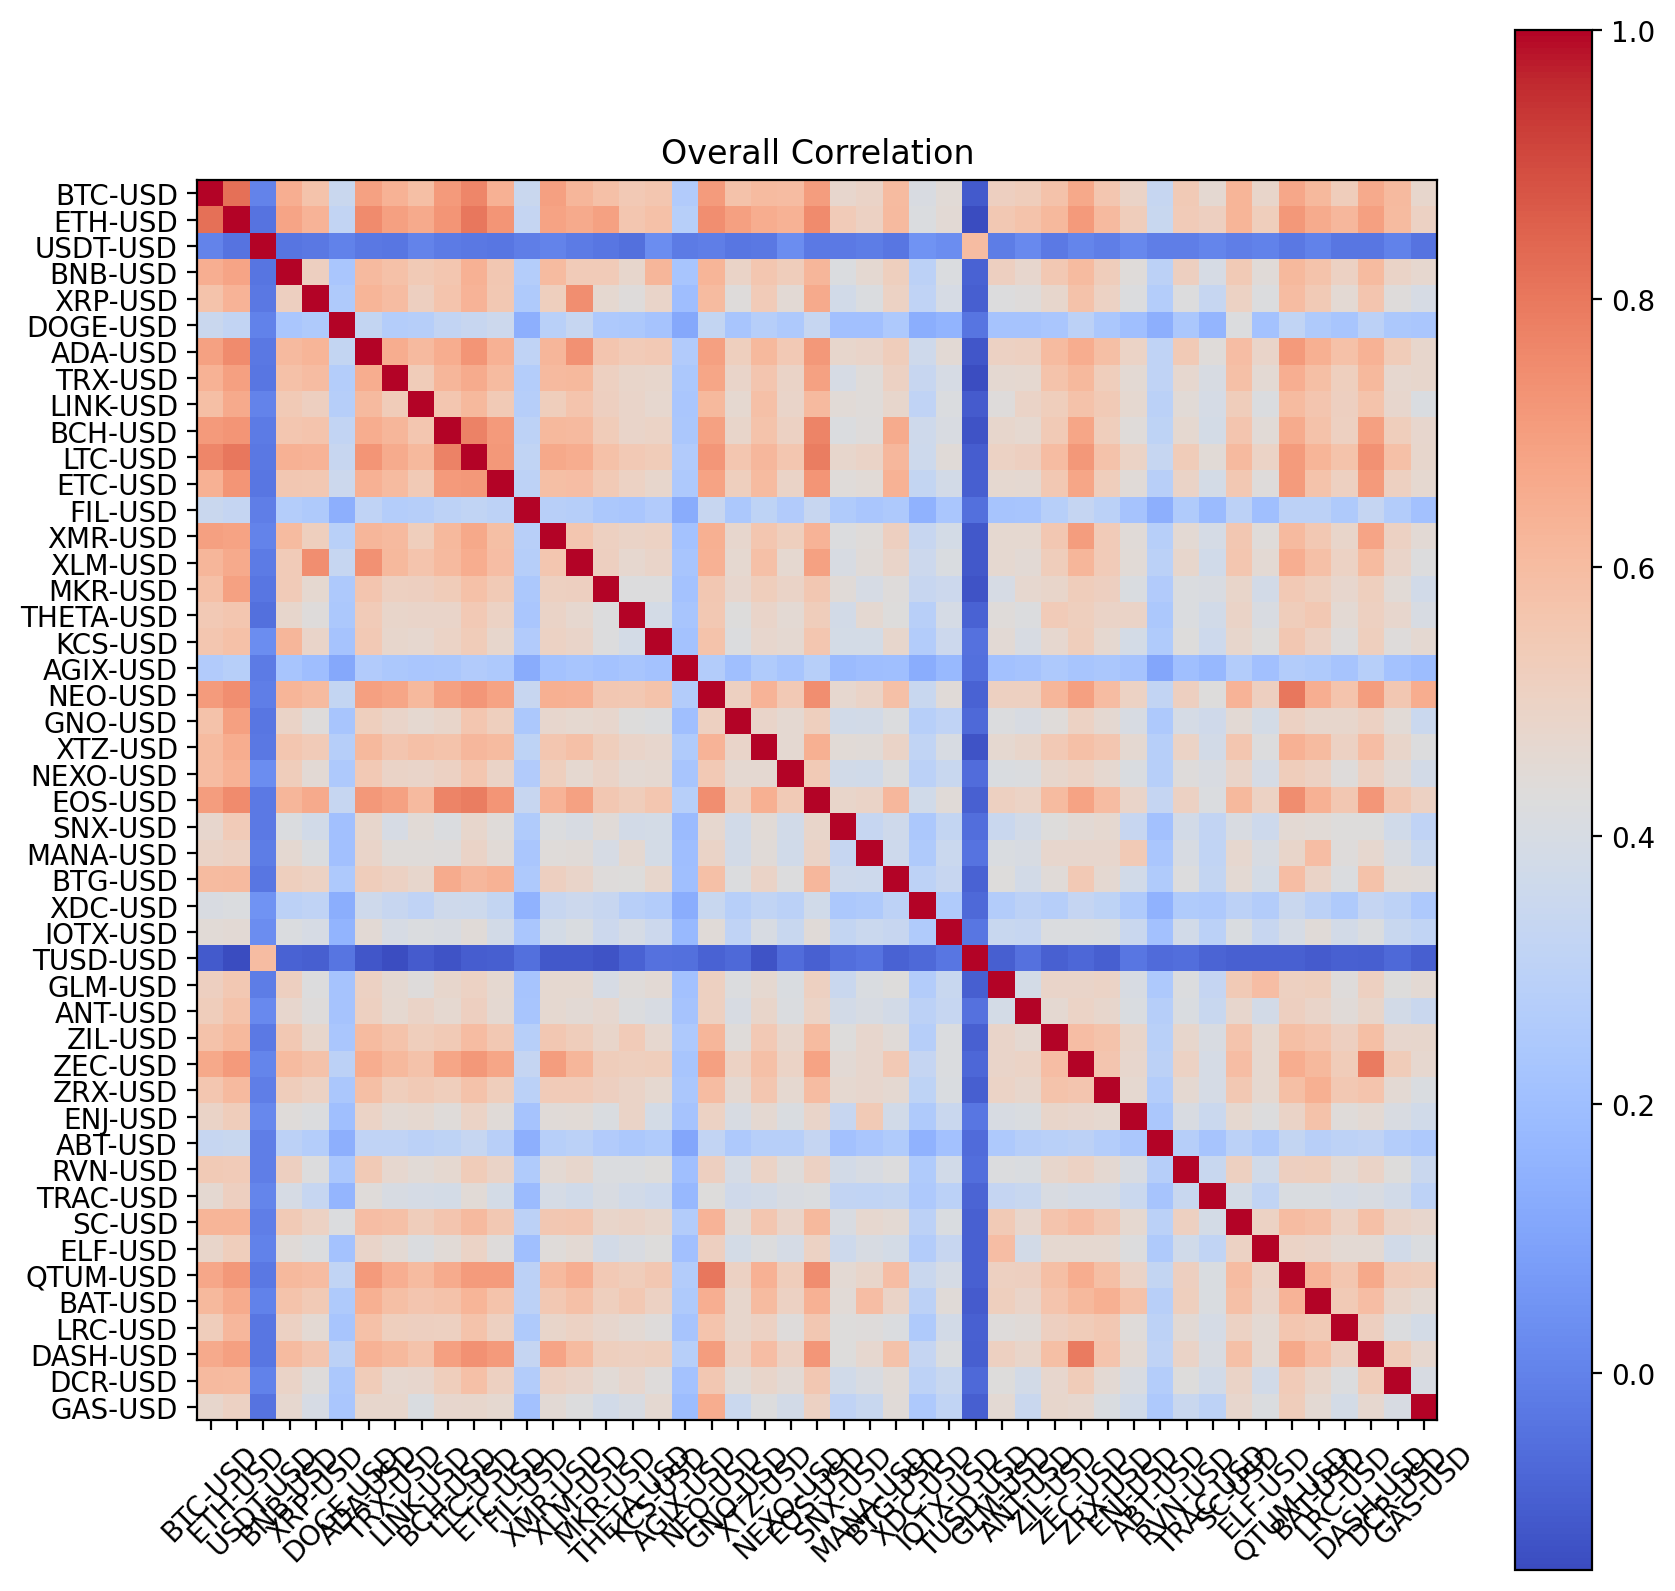

In [23]:
corr = preprocessor.calculate_overall_correlation(returns)
preprocessor.visualize_overall_correlation(corr)

### Корреляция в динамике

Для примера посмотрим на месячные граффики корреляций для биткоина

Визуальный анализ показывает, что корреляции довольно нестабильны во времени

Большинство монет ведут себя похоже, однако можно выделить отдельные клтеры по поведению: разбросу, знаку и тд.

Для определения параметров графа будем использовать корреляции между монетами

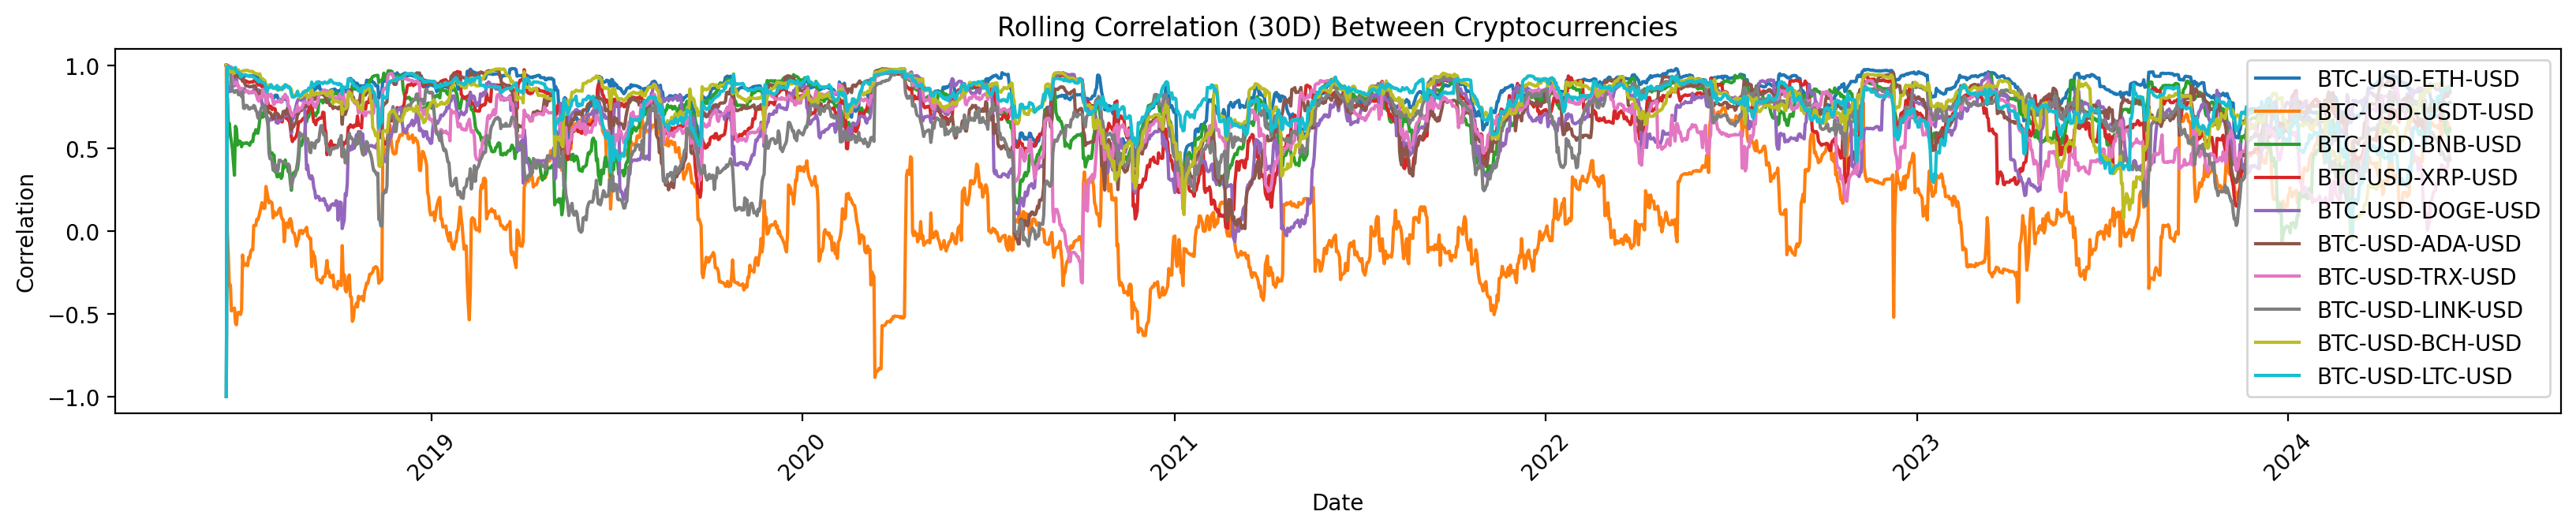

In [24]:
corr_month = preprocessor.calculate_rolling_correlation(returns)

preprocessor.visualize_rolling_correlation(corr_month)

**Вывод:**
На графике изображён пример корреляции с выбранными монетами (только 10 штук) - корредяция скользящим окном в 30 дней 

Как видим связи довольно непостоянны, большая часть связей можно выделить в отдельный сильно связный кластер по своему поведению, однако, также присутсвуют монеты, связь с которыми можно назвать нетипичной

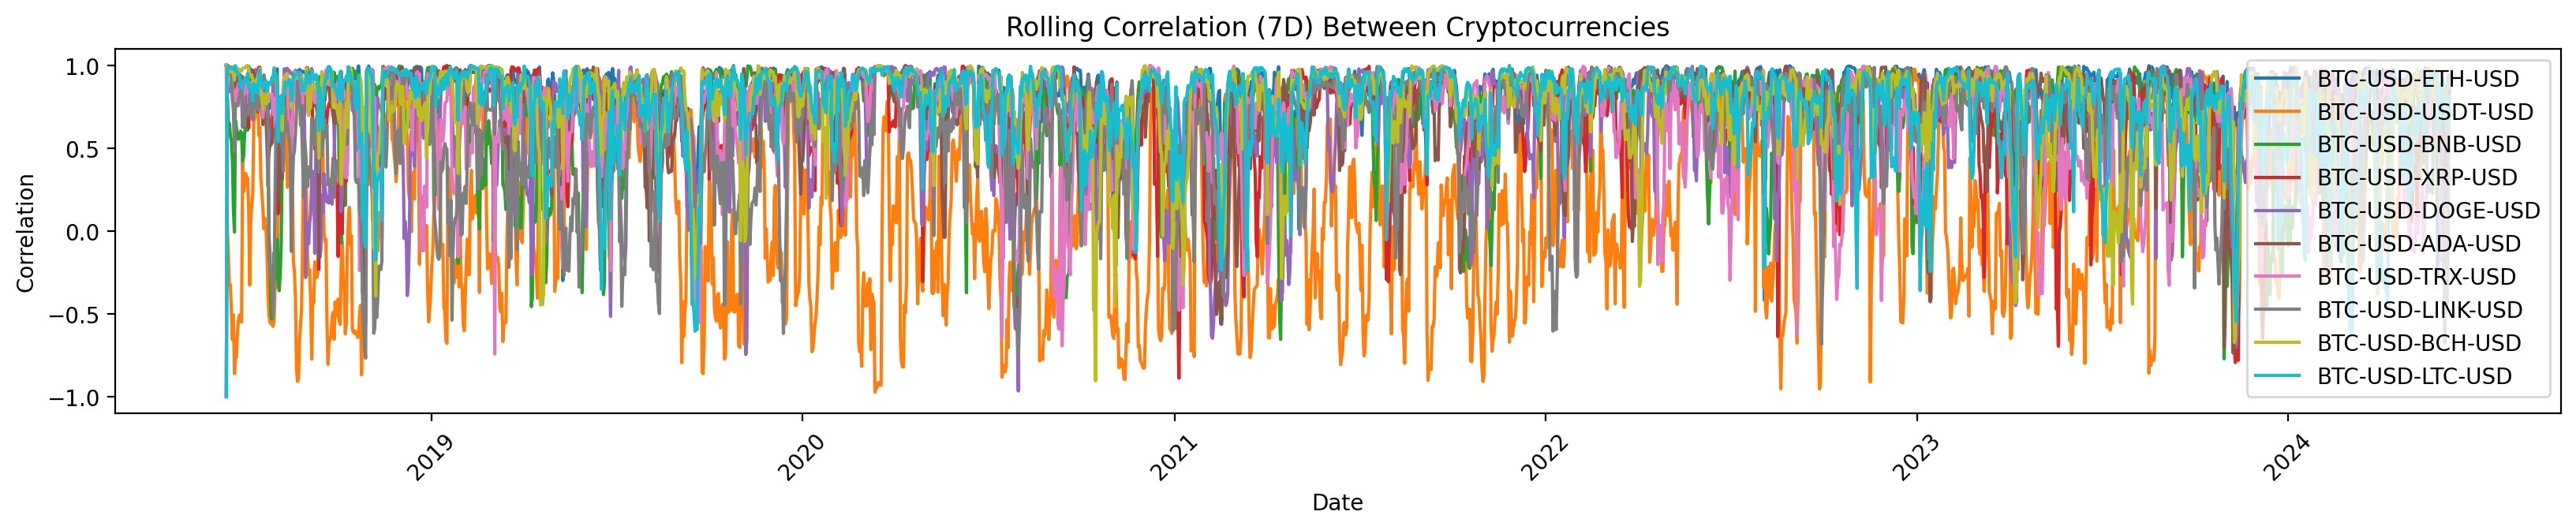

In [19]:
preprocessor = CryptoPreproc(crypto_values)
returns = preprocessor.returns_calc()

corr_month = preprocessor.calculate_rolling_correlation(returns,  window='7D')
preprocessor.visualize_rolling_correlation(corr_month,  window='7D')

### Энтропия в динамике

In [20]:
# returns

In [21]:
preprocessor = CryptoPreproc(crypto_values)
returns = preprocessor.returns_calc()

transfer_entropies = preprocessor.calculate_transfer_entropy(returns)
# transfer_entropies.to_csv('transfer_entropies.csv')

Calculating Transfer Entropy: 100%|██████████| 2159/2159 [19:06<00:00,  1.88it/s]


In [23]:
# preprocessor.visualize_transfer_entropy(transfer_entropies, title="Transfer Entropy Over Time")

In [27]:
corr_month.to_csv('corr_month.csv')
# corr_month.head()

Date   level_1   BTC-USD   ETH-USD  USDT-USD   BNB-USD   XRP-USD  \
0      2018-06-12   BTC-USD       NaN       NaN       NaN       NaN       NaN   
1      2018-06-12   ETH-USD       NaN       NaN       NaN       NaN       NaN   
2      2018-06-12  USDT-USD       NaN       NaN       NaN       NaN       NaN   
3      2018-06-12   BNB-USD       NaN       NaN       NaN       NaN       NaN   
4      2018-06-12   XRP-USD       NaN       NaN       NaN       NaN       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
102878 2024-06-08   BAT-USD  0.636579  0.650277 -0.067095  0.558439  0.713047   
102879 2024-06-08   LRC-USD  0.838186  0.829418  0.136071  0.766225  0.852600   
102880 2024-06-08  DASH-USD  0.812597  0.744870 -0.047011  0.796857  0.899343   
102881 2024-06-08   DCR-USD  0.735370  0.814478 -0.223161  0.780082  0.820212   
102882 2024-06-08   GAS-USD  0.871155  0.806692  0.086579  0.832312  0.914323   

        DOGE-USD   ADA-USD   TRX-USD  ...   RVN-USD  TRAC-USD    SC-USD  \
0            NaN       NaN       NaN  ...       NaN       NaN       NaN   
1            NaN       NaN       NaN  ...       NaN       NaN       NaN   
2            NaN       NaN       NaN  ...       NaN       NaN       NaN   
3            NaN       NaN       NaN  ...       NaN       NaN       NaN   
4            NaN       NaN       NaN  ...       NaN       NaN       NaN   
...          ...       ...       ...  ...       ...       ...       ...   
102878  0.727263  0.722978  0.136343  ...  0.866004  0.137362  0.892663   
102879  0.888870  0.776833  0.072264  ...  0.932194  0.395832  0.854012   
102880  0.882825  0.805300  0.096885  ...  0.972562  0.442891  0.909977   
102881  0.873295  0.507007  0.313021  ...  0.850373  0.648660  0.895931   
102882  0.914558  0.768671  0.245167  ...  0.987477  0.492281  0.949702   

         ELF-USD  QTUM-USD   BAT-USD   LRC-USD  DASH-USD   DCR-USD   GAS-USD  
0            NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2            NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3            NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4            NaN       NaN       NaN       NaN       NaN       NaN       NaN  
...          ...       ...       ...       ...       ...       ...       ...  
102878  0.475211  0.926832  1.000000  0.905712  0.891009  0.737908  0.913246  
102879  0.472563  0.963549  0.905712  1.000000  0.943086  0.829576  0.951012  
102880  0.454236  0.993907  0.891009  0.943086  1.000000  0.908848  0.975805  
102881  0.693935  0.874842  0.737908  0.829576  0.908848  1.000000  0.880979  
102882  0.529879  0.985324  0.913246  0.951012  0.975805  0.880979  1.000000  

[102883 rows x 49 columns]

### Посмотрим на двойное экспоненциальное сглаживание

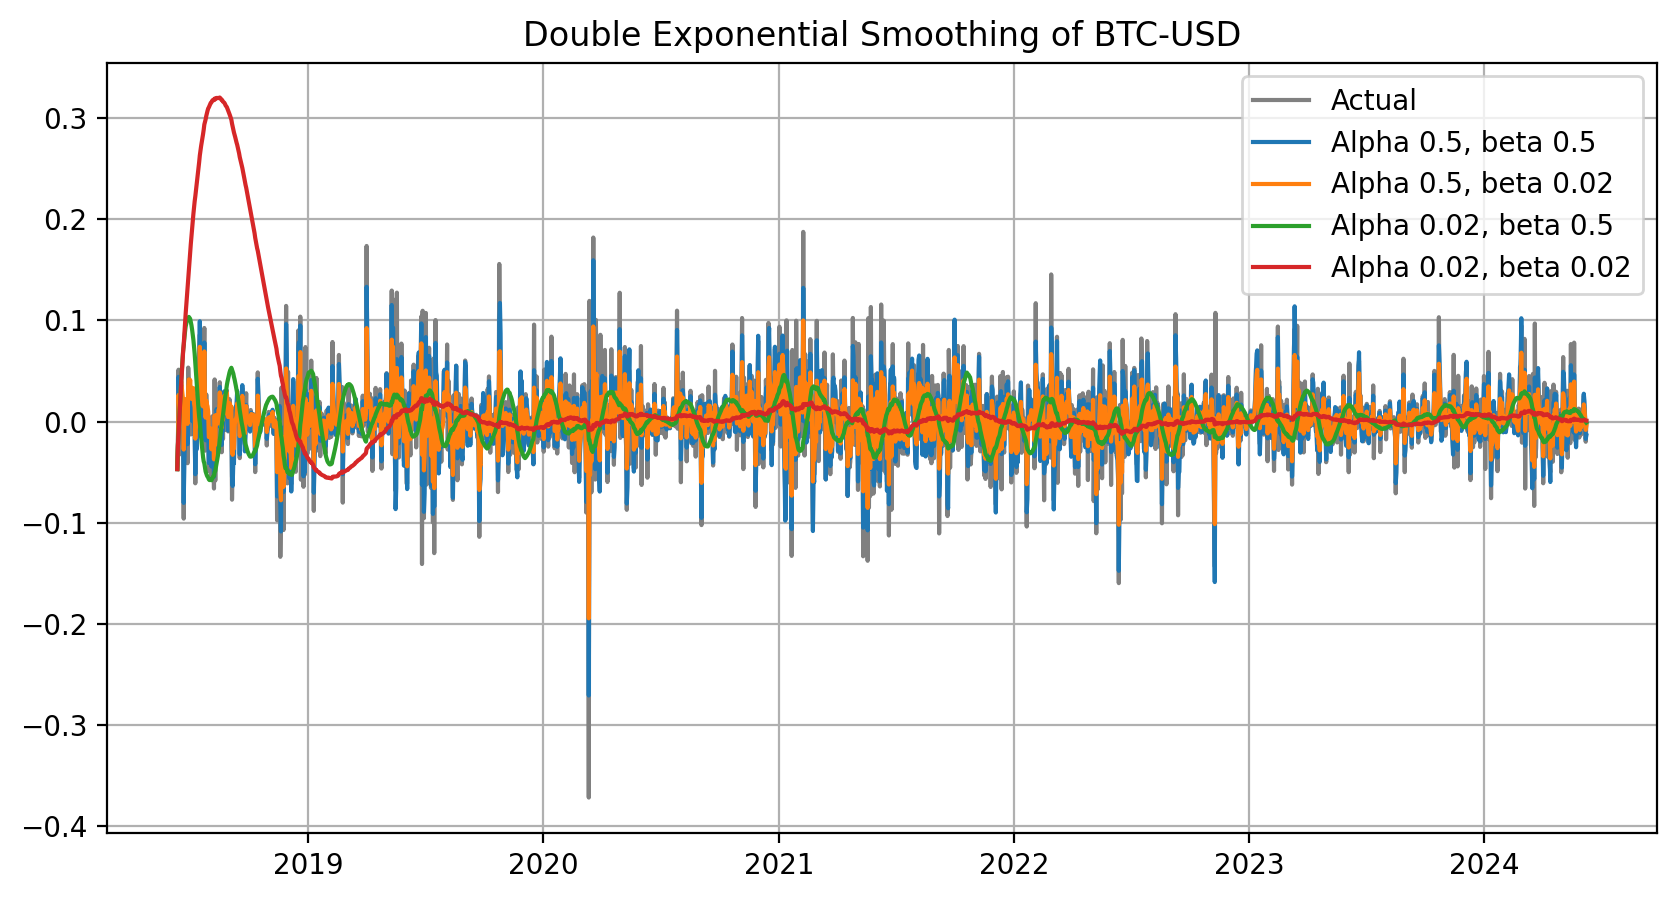

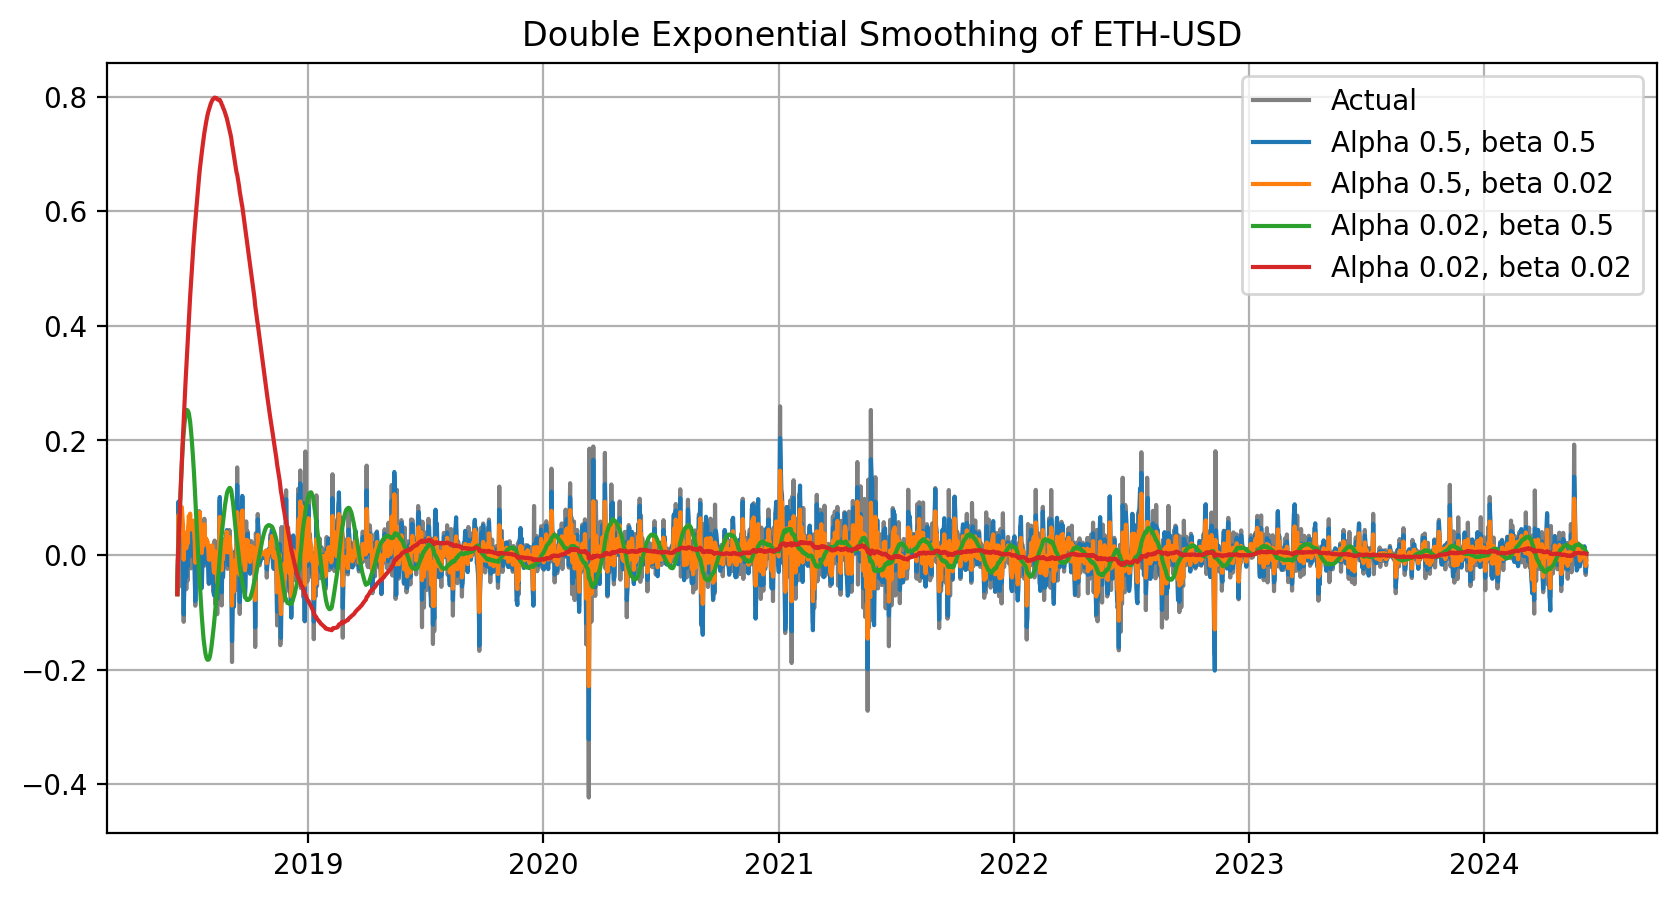

In [28]:
alpha = [0.5, 0.02]
beta = [0.5, 0.02]

returns = preprocessor.returns_calc().dropna().reset_index(drop=True)

preprocessor.double_exp_plot(returns,'BTC-USD',alpha, beta)

preprocessor.double_exp_plot(returns,'ETH-USD',alpha, beta)

**По итогу обрабоки данных получили следующие результаты:**
- подневные данные по 47 монетам за последние 5 лет
- выбор окна агрегации в 30 дней
- расчёт дневной доходности, корреляции и трансфертной энтропии скользящим окном в 30 дней
  